In [13]:
import numpy as np
import matplotlib.pyplot as plt

def create_data():
    data = []
    #y = []
    label = []
    #file1=open('two_circle.txt')
    with open('two_circle.txt', 'r') as text:
        #lines=text.readlines()
        for line in text.readlines():
            _x, _y, _label = line.split()
            data.append((float(_x),float(_y)))
            #y.append(float(_y))
            label.append(int(_label))
    label = np.array(label)
    return np.array(data), np.array(label)

# x,y,label=file.split()
# print(x)

In [2]:
x, y = create_data()
y

array([-1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1,
        1,  1, -1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1,  1,  1, -1,
       -1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,
       -1,  1, -1, -1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,
       -1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1,  1, -1,
        1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1,
       -1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,
        1,  1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1])

In [3]:
class Perceptron(object):
    # learning_rate = 0.01

    def __init__(self):
        self.errors_ = None
        self.learning_rate = 0.1
        self.weights=None
        self.bias=0.1
        self.n_iter=100
    def net_input(self, X):
        z = np.dot(X, self.weights[:]) + self.bias
        return z

    def predict(self, X):
        return np.where(self.net_input(X) >= 0, 1, -1)

    def fit(self, X, y):
        rgen = np.random.RandomState(1)
        self.weights = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.bias=self.weights[0]
        self.weights=self.weights[1:]
        self.errors_ = []
        for _ in range(self.n_iter): #Repeat training data for the number of trainings
            output = self.predict(X)
            errors = y - output
            self.weights[:] += self.learning_rate * X.T.dot(errors)
            #Weight w_Update 0
            self.bias += self.learning_rate*errors
            #Calculation of cost function
            cost = Perceptron.MSE(y,output)
            #Cost storage
            self.errors_.append(cost)
        return self

#     def fit(self, X, y):
#         rand = np.random.RandomState(1)
#         self.weights = rand.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
#         self.bias=self.weights[0]
#         self.weights=self.weights[1:]
#         self.errors_ = []
#         for _ in range(100):
#             errors = 0
#             for _p, target in zip(X, y):
#                 y_hat=self.predict(_p)
#                 errors = target-y_hat
#                 update = self.learning_rate * errors
#                 self.weights[:] += update * _p
#                 self.bias += update
#                 errors += int(update != 0.0)
#                 #cost = (errors ** 2).sum() / 2.0
#                 #Cost storage
#                 #self.cost_.append(cost)
#             self.errors_.append(errors)

    @staticmethod
    def MSE(real, output):
        return ((np.array(real) - np.array(output))**2).mean()

    @staticmethod
    def accuracy(real, output):
        count = t != np.sign(test_label)
        return np.sum(count)/len(real)




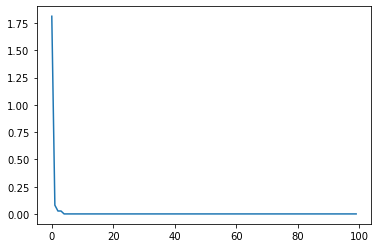

In [4]:
per_model=Perceptron()
per_model.fit(x,y)
plt.plot(per_model.errors_)
plt.show()

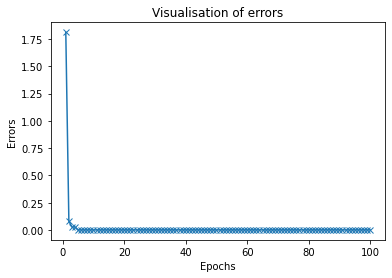

In [5]:
plt.plot(range(1, len(per_model.errors_) + 1), per_model.errors_, marker = 'x')
plt.title("Visualisation of errors")
plt.xlabel('Epochs')
plt.ylabel('Errors')
plt.show()

In [6]:
def plot_labels(x,model):
    """
    Plot the outputs of each neuron in the given layer
    """
    neuron_number = 0
    #for neuron in layer_output:
    y_hat=model.predict(x)
        # green dots
    plt.scatter(x=x[y_hat == -1, 1], y=x[y_hat == -1, 0], alpha=0.9,
                    c='green', marker='s', label=-1.0)

        # orange dots
    plt.scatter(x=x[y_hat == 1, 1], y=x[y_hat == 1, 0], alpha=0.9,
                    c='orange', label=1.0)

        # location of the legend
    plt.legend(loc='upper left')

#         # set the title
#         if title:
#             plt.title(title)
#         else:
#             plt.title("Layer: " + str(layer_number) + " Neuron: " + str(neuron_number + 1))
#         neuron_number += 1

        # plot
    plt.show()

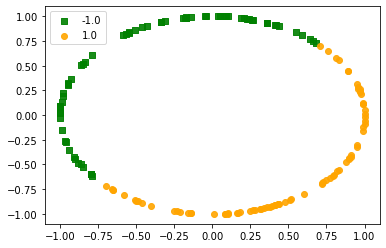

In [7]:
plot_labels(x,per_model)

# Part 2:

In [38]:
from sklearn.model_selection import train_test_split
def read_data2():
    points=[]
    with open('four_circle.txt', 'r') as text:
        for line in text.readlines():
            _x, _y, _label = line.split()
            #lines.append(Line())
            points.append(Point(float(_x),float(_y),int(_label)))
    points=np.array(points)
    lines=create_lines(points)
    return points,lines

def create_lines(points):
    lines=[]
    for i in range(len(points)):
        p1=points[i]
        for j in range(i+1,len(points)):
            p2=points[j]
            lines.append(Line(p1,p2,1))
            lines.append(Line(p1,p2,-1))
    return np.array(lines)

def split_data(points: list):
    """
    splits the data into train and test //maybe wil be depraceted later
    :param points: list of data points
    :return: train & test groups.
    """
    return train_test_split(points, test_size=0.5, random_state=42)

In [39]:
class Point:
    def __init__(self, x: float, y: float, label: int):
        """
        :param x: X-axis
        :param y: Y-axis
        :param label: The given data point label
        """
        self.x = x
        self.y = y
        self.label = label
        self.w = 0

#     def toArray(self):
#         """
#         This function converts a single data point into array: [x, y, label]
#         :return: array
#         """
#         return [self.x, self.y, self.label]

In [40]:
class Line:
    def __init__(self, p1: Point, p2: Point, direct: int):
        """
        - Rule: y=ax+b
        :param point: Single point for computing line equation.
        :param coefficient: a
        :param bias: b
        """
        self.p1 = p1
        self.p2 = p2
        #self.a = (self.p1.y - self.p2.y)
        x=self.p1.x-self.p2.x
        y=self.p1.y-self.p2.y
#         self.b = (self.p2.x - self.p1.x)
#         self.c = (self.p1.x * self.p2.y - self.p2.x * self.p1.y)
        self.direct = direct
        self.w=0

    def eval(self, p: Point):
        """
        we will use the following equation to determine the label of a point
        value = (x1 - x0)(y2 - y0) - (x2 - x0)(y1 - y0)
        if value > 0, p2 is on the left side of the line.
        if value = 0, p2 is on the same line.
        if value < 0, p2 is on the right side of the line.
        :return: eval
        """
        if x*(p.x-self.p2.x)-(p.x-self.p2.x)*y>=0:
            return self.direct
        else:
            return -self.direct

In [41]:

#     if len(points) % 2 == 0:
#         return points[:int(len(points) / 2)], points[int(len(points) / 2):]
#     else:
#         return points[:int((len(points) + 1) / 2)], points[int((len(points) + 1) / 2):]



In [52]:
def predict(lines: list, point: Point):
    """
    This function predicts the true label of a points based
    on the rules given with their corresponding weights
    Hk(X) from the presentation
    """
    sum = 0
    for h in lines:
        sum += h.w * h.eval(point)
    return 1 if sum > 0 else -1


def point_error(lines: list, point: Point):
    """
    This function calculates the error on given point with a given set of rules
    """
    return 1 if predict(lines, point) != point.label else 0


def list_error(lines: list, pnts: list):
    """
      This function calculates the error on given points
      :param rules_with_weights: list of important rules.
      :param l: list of data points (training set)
      :return: total error
      """
    total_error = 0
   # positive_error_sum = 0
#     positive_count = 0
#     negative_error_sum = 0
#     negative_count = 0

    for p in pnts:
        error = point_error(lines, p)
        total_error += error

    return total_error / len(points)


def calculate_error(lines: list, train: list, test: list, iterations: int):
    """
    This function calculates the empirical error on the training and test sets.
    :param rules_with_weights: list of important rules.
    :param train: list of data points (training set)
    :param test: list of data points (testing set)
    :param iterations: number of iterations for computing the empirical errors
    :return: lists of empirical errors on the training and testing set over k iterations.
    - NOTE: This function was CHANGED!
    """
    #train_errors, test_errors = ([] for _ in range(2))
    train_errs=[]
    test_errs=[]
    iterations = len(lines) if iterations > len(lines) else iterations

    for i in range(iterations):
        train_errs.append(list_error(lines[:i + 1], train))
        test_errs.append(list_error(lines[:i + 1], test))

    return train_errors, test_errors


def run(points: list, rules: list, iterations: int):
    """
    This function simulates a single run of Adaboost algorithm.
    :param points: list of data points
    :param iterations: number of iterations to perform the algorithm.
    :return:
    """
    train, test = split_data(points)
    for pt in train:
        pt.w = 1 / len(train)  # Initialize point weights
    min_lines = []
    for i in range(iterations):
        min_error = np.inf  # Find the min error each iteration and the classifier.
        min_clfs = []
        for h in rules:
            error = 0
            for pt in train:
                """step 3 , caculate weighted error"""
                if h.eval(pt) != pt.label:
                    error += pt.w

            if len(min_clfs) == 0 or error <= min_error:   """Find min. error classifier step 4"""
                if error != min_error: """if its smaller than the current min classifier then change it"""
                    min_error = error
                    min_clfs.clear()
                min_clfs.append(h)

        clf_weight = 0.5*np.log((1 - min_error) / min_error) """  Update classifier weight based on error , step 5"""
        Zt = 0
        min_clf = min_clfs[0] #get the best classifier#random.choice(min_classifiers)

        for pt in train:
            """ Calculate the normalizing constant (Zt) step 5.5 and update all the points weights"""
            pt.w = pt.w * (math.e ** (clf_weight * min_clf.eval(pt) * pt.label))
            Zt += pt.w
        for pt in train:
            pt.w = pt.w / Zt
        min_clf.w=clf_weight
        min_lines.append(min_clf)
    return calculate_error(lines, train, test, iterations)

    # TODO - Return the empirical error of the function H on the training set and on the test set.

IndentationError: unexpected indent (Temp/ipykernel_15572/3757614100.py, line 88)

In [ ]:
points,lines = read_data2()
#lines = create_lines(points)
iterations = 8
rounds = 100
error_means_train=[]
error_means_test=[]
train_errors= np.zeros(shape=(rounds,iterations))
test_errors = np.zeros(shape=(rounds,iterations))
# train_errors = [[0 for i in range(rounds)] for j in range(iterations)]
# train_errors_pos = [[0 for i in range(rounds)] for j in range(iterations)]
# train_errors_neg = [[0 for i in range(rounds)] for j in range(iterations)]

# test_errors = [[0 for i in range(rounds)] for j in range(iterations)]
# test_errors_pos = [[0 for i in range(rounds)] for j in range(iterations)]
# test_errors_neg = [[0 for i in range(rounds)] for j in range(iterations)]

for i in range(rounds):
    train_error, test_error = run(points, lines, iterations)

    for j in range(iterations):
        train_errors[j][i] = train_error[j][0]
        error_means_train=np.mean(train_error)
#         train_errors_pos[j][i] = train_error[j][1]
#         train_errors_neg[j][i] = train_error[j][2]
        error_means_test=np.mean(test_error)
        test_errors[j][i] = test_error[j][0]
#         test_errors_pos[j][i] = test_error[j][1]
#         test_errors_neg[j][i] = test_error[j][2]

    print(i)

print("error")
for i in range(iterations):
    print("k = ", (i + 1),
          "train error: ", "%.3f" %train_means_train[i],
          "test error: ", "%.3f" % error_means_test[i])
# def generate_data_lists(points: list, lines: list):
#     """
#     This function receives a list of data points and converts it to 4 different lists:
#     - X and Y list of data points for each label.
#     :param points: list of data points to convert
#     :return: the generated lists
#     """
#     x1, y1, x2, y2 = ([] for _ in range(4))
#     for pt in points:
#         if pt.label != predict_value(lines, pt):
#             x1.append(pt.x)
#             y1.append(pt.y)
#         else:
#             x2.append(pt.x)
#             y2.append(pt.y)
#     return x1, y1, x2, y2


# def represent_data_points(points: list, rules_with_weights: list):
#     """
#     This function plots the data points.
#     :param points: list of data points to plot.
#     :return: None
#     """
#     x1, y1, x2, y2 = generate_data_lists(points, rules_with_weights)
#     plt.scatter(x1, y1, color='red')
#     plt.scatter(x2, y2, color='blue')

#     for rule in lines:
#         r = rule
#         plt.plot([r.p1.x, r.p1.y], [r.p2.x, r.p2.y], marker='o')

#     # TODO - Add classifier lines

#     plt.show()
